In [29]:
import os
import cv2
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [30]:
%reload_ext autoreload
%autoreload 2

In [32]:
config_path = os.path.join("..", "..", "..", "..", "configs", "lab3", "config.yaml")
with open(config_path, "r") as file:
    config = yaml.safe_load(file)
video_path = os.path.join("..", "..", "..", "..", "assets", "mazeweek2.mp4")
folder1_path = os.path.join(
    "..", "..", "..", "..", "assets", "mazeweek2_frames", "capture_20241210_135117"
)
folder2_path = os.path.join(
    "..", "..", "..", "..", "assets", "mazeweek2_frames", "capture_20241210_141131"
)
output_path = os.path.join("..", "..", "..", "..", "assets", "mazeweek2_final")

In [27]:
def undistort_image(img, K, dist_coeffs, model="default"):
    h, w = img.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(
        K, dist_coeffs, (w, h), 1, (w, h)
    )
    undistorted = cv2.undistort(img, K, dist_coeffs, None, new_camera_matrix)
    x, y, w, h = roi
    undistorted = undistorted[y : y + h, x : x + w]
    return undistorted


def _undistort_image(img):
    img = undistort_image(
        img,
        np.array(
            [
                [286.28527, 0.0, 323.62102],
                [0.0, 285.83978, 200.52749],
                [0.0, 0.0, 1.0],
            ]
        ),
        np.array(
            [
                0.504856,
                -0.113855,
                0.000454,
                -0.000873,
                -0.009483,
                0.845664,
                -0.043607,
                -0.040976,
            ],
        ),
    )
    return img

In [14]:
def split_video_to_frames(video_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if frame_count < 150:
            frame_count += 1
            continue
        if not ret:
            break
        frame_filename = f"{output_folder}/frame_{frame_count-150:05d}.jpg"  # little hack to have them ordered
        frame = _undistort_image(frame)
        cv2.imwrite(frame_filename, frame)
        frame_count += 1
    cap.release()
    print(f"Extracted {frame_count-150} frames")
    return frame_count - 150


frame_count = split_video_to_frames(video_path, output_path)

Extracted 4253 frames


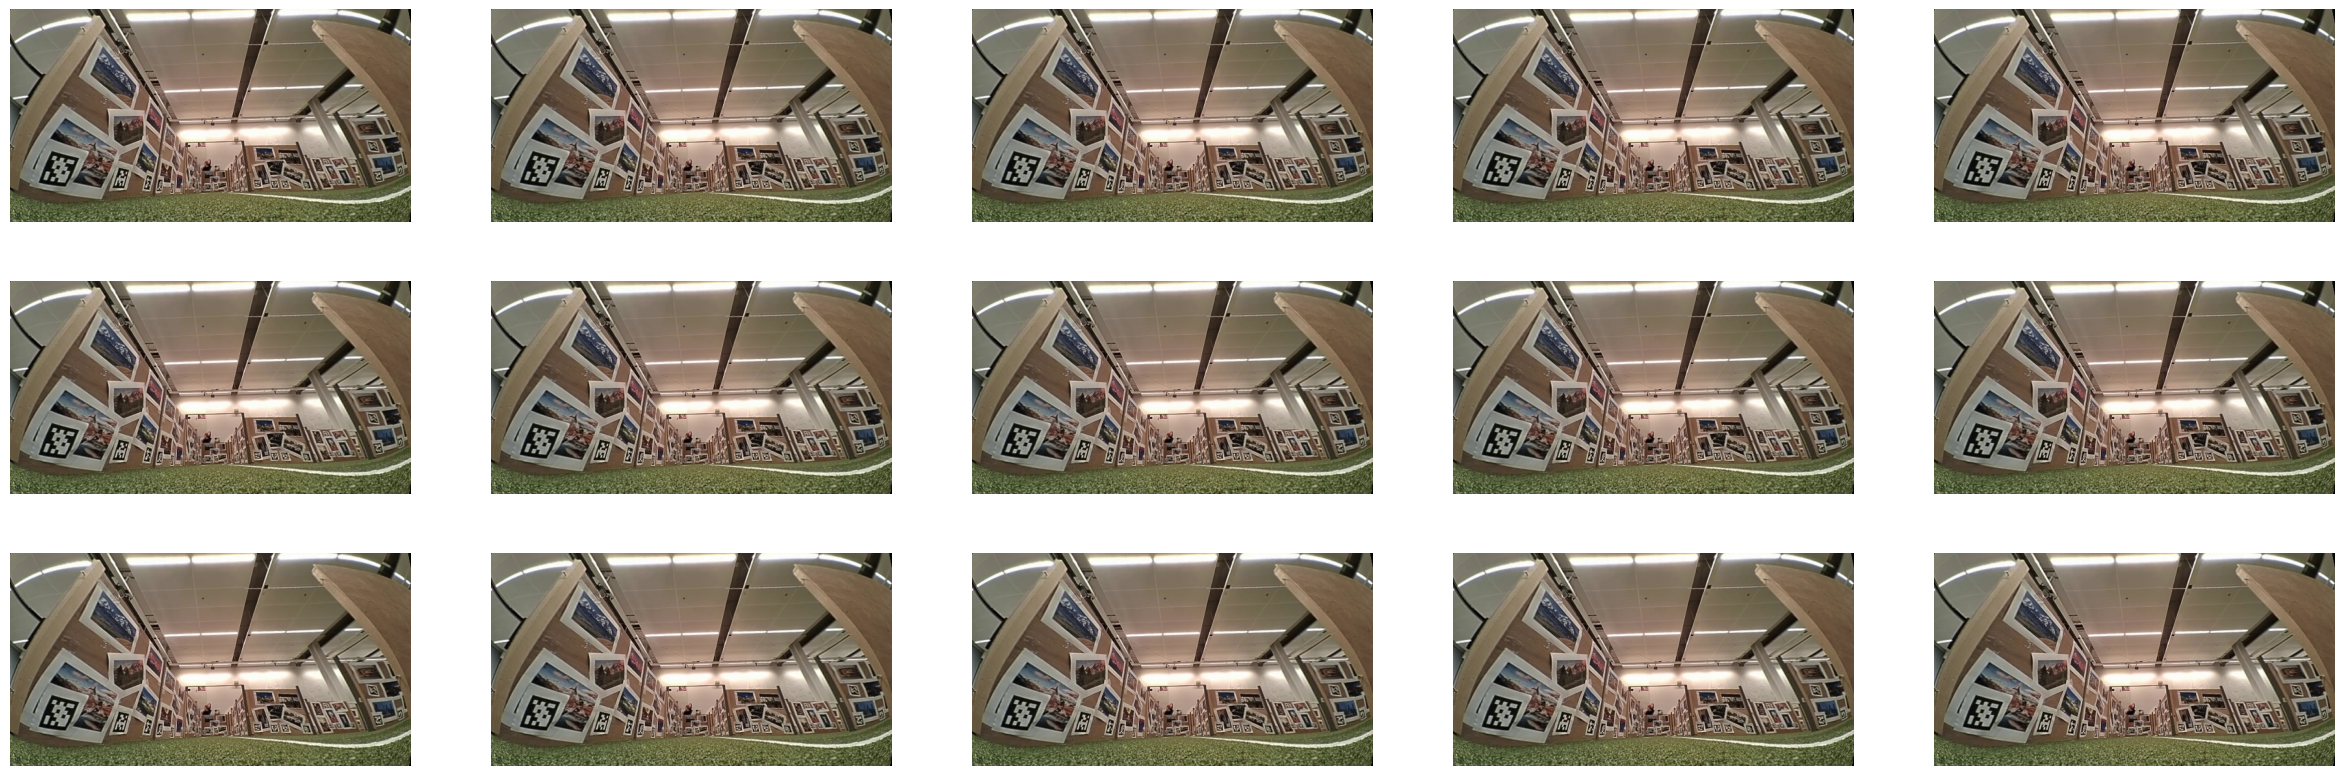

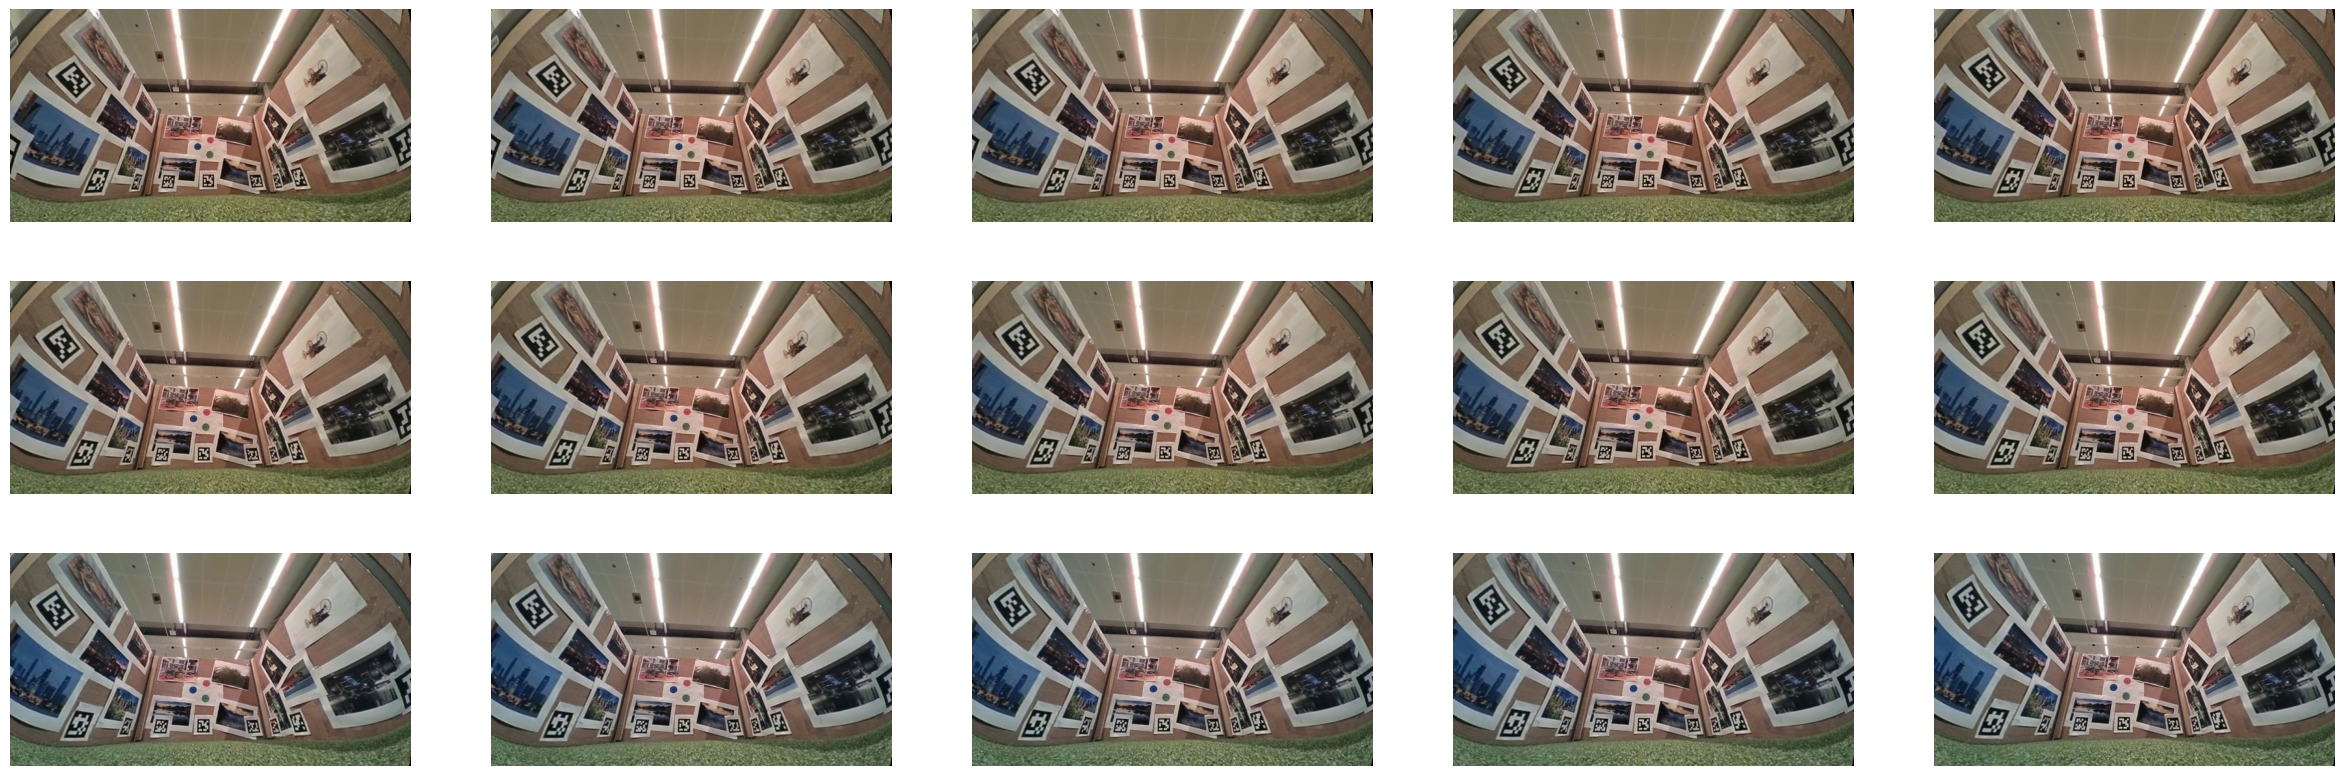

In [13]:
cutoff_first_frame = 45  # 50 seems good to start
fig, axs = plt.subplots(3, 5, figsize=(30, 10))
for i in range(cutoff_first_frame, cutoff_first_frame + 15):
    img = mpimg.imread(f"{output_path}/frame_{i:05d}.jpg")
    i -= cutoff_first_frame
    axs[i // 5, i % 5].imshow(img)
    axs[i // 5, i % 5].axis("off")
plt.show()

cutoff_last_frame = 675  # motivation for last cutoff (680 seems nice)
fig, axs = plt.subplots(3, 5, figsize=(30, 10))
for i in range(cutoff_last_frame - 15, cutoff_last_frame):
    img = mpimg.imread(f"{output_path}/frame_{i:05d}.jpg")
    axs[(i - cutoff_last_frame + 15) // 5, (i - cutoff_last_frame + 15) % 5].imshow(img)
    axs[(i - cutoff_last_frame + 15) // 5, (i - cutoff_last_frame + 15) % 5].axis("off")
plt.show()